In [449]:
import pandas as pd

df = pd.read_csv('data/Fish.csv')

In [450]:
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [451]:
cond = df['Species'].isin(['Bream', 'Smelt'])

In [452]:
fish_data = df.loc[cond, ['Length2', 'Weight']]
fish_data.head()

,Length2,Weight
0,25.4,242.0
1,26.3,290.0
2,26.5,340.0
3,29.0,363.0
4,29.0,430.0


In [454]:
fish_target = df.loc[cond, ['Species']] #내가 맞추고 싶은 목표값
fish_target.head()

,Species
0,Bream
1,Bream
2,Bream
3,Bream
4,Bream


#4개의 변수 한번에 선언...
```
a, b, c, d = [1, 2, 3,4 ]
print(a, b, c, d) 와 동일한 코드
```

In [355]:
from sklearn.model_selection import train_test_split

In [356]:
#일정한 비율이 필요할때 사용하는 옵션 (random_state, stratify)
train_input, test_input, train_target, test_target = train_test_split(fish_data, fish_target, stratify=fish_target ,random_state=42)

In [357]:
train_target['Species']

26     Bream
3      Bream
150    Smelt
9      Bream
149    Smelt
30     Bream
152    Smelt
15     Bream
153    Smelt
27     Bream
16     Bream
0      Bream
29     Bream
155    Smelt
145    Smelt
1      Bream
23     Bream
11     Bream
148    Smelt
5      Bream
157    Smelt
24     Bream
154    Smelt
12     Bream
33     Bream
19     Bream
17     Bream
146    Smelt
2      Bream
13     Bream
32     Bream
10     Bream
8      Bream
4      Bream
31     Bream
21     Bream
Name: Species, dtype: object

In [358]:
from sklearn.neighbors import KNeighborsClassifier

In [359]:
kn = KNeighborsClassifier()

In [360]:
kn.fit(train_input, train_target['Species']) #fit은 train

KNeighborsClassifier()

In [361]:
kn.score(test_input, test_target) #score은 test

1.0

In [362]:
kn.predict([[25,150]])

C:\Users\2-13\Desktop\DMF\ML\venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array(['Smelt'], dtype=object)

In [363]:
import matplotlib.pyplot as plt

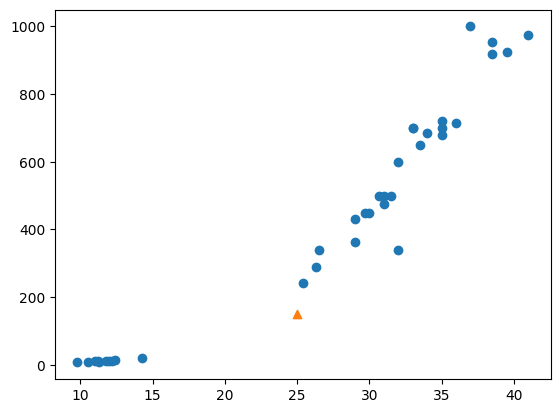

In [364]:
plt.scatter(train_input['Length2'], train_input['Weight'])
plt.scatter(25,150, marker="^")
plt.show()

In [365]:
#dataframe > 2차원 #series > 1차원 (몇차원이면 동작하는가?)

In [366]:
distance, indexes = kn.kneighbors([[25,150]])

C:\Users\2-13\Desktop\DMF\ML\venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [367]:
indexes #fancy indexing 뭔지 모름^^^^^~

array([[11, 20, 13, 22, 15]])

In [368]:
n_df = train_input.iloc[indexes[0]]

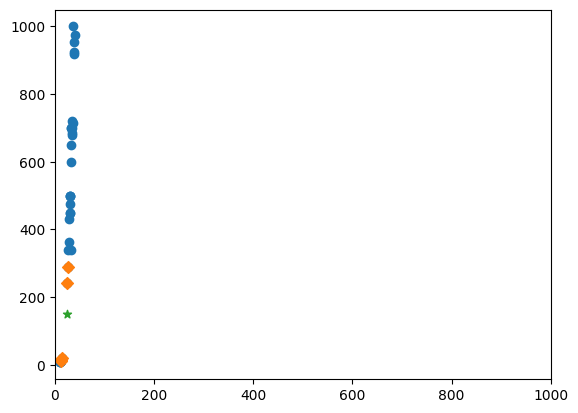

In [369]:
plt.scatter(train_input['Length2'], train_input['Weight'])
plt.scatter(n_df['Length2'],n_df['Weight'], marker = 'D')
plt.scatter(25,150, marker="*")
plt.xlim(0,1000)
plt.show()

- 표준점수
    - (데이터 - 평균) / 표준편차

In [370]:
mean = train_input.mean()
std = train_input.std()

In [371]:
train_input.head()

,Length2,Weight
26,35.0,720.0
3,29.0,363.0
150,11.3,8.7
9,30.7,500.0
149,11.2,9.8


In [372]:
train_scaled = ((train_input-mean) / std)

In [373]:
new = ([25, 150] - mean) / std
new

Length2   -0.188902
Weight    -0.884177
dtype: float64

In [374]:
kn.fit(train_scaled, train_target['Species'])

KNeighborsClassifier()

In [375]:
test_scaled = (test_input - mean) / std

In [376]:
kn.score(test_scaled, test_target)

1.0

In [377]:
kn.predict([new])

C:\Users\2-13\Desktop\DMF\ML\venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array(['Bream'], dtype=object)

# 펭귄 데이터 연습

In [478]:
import seaborn as sns

In [479]:
df = sns.load_dataset('penguins')
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [480]:
df['species'].value_counts()

species
Adelie       152
Gentoo       124
Chinstrap     68
Name: count, dtype: int64

In [481]:
df.groupby('species').mean(numeric_only=True)

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
species,,,,
Adelie,38.791391,18.346358,189.953642,3700.662252
Chinstrap,48.833824,18.420588,195.823529,3733.088235
Gentoo,47.504878,14.982114,217.186992,5076.016260


In [485]:
# 전처리
df_a = df.dropna()

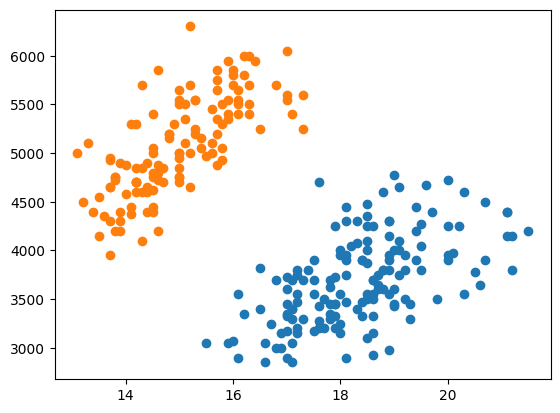

In [489]:
#인사이트?를 얻기위해 시각화 (강사님)
import matplotlib.pyplot as plt

cond_adel = df['species'] == 'Adelie'
cond_gent = df['species'] == 'Gentoo'
#cond_chin = df['species'] == 'Chinstrap'

plt.scatter(df.loc[cond_adel, 'bill_depth_mm'], df.loc[cond_adel, 'body_mass_g'])
plt.scatter(df.loc[cond_gent, 'bill_depth_mm'], df.loc[cond_gent, 'body_mass_g'])
#plt.scatter(df.loc[cond_chin, 'bill_length_mm'], df.loc[cond_chin, 'body_mass_g'])

In [483]:
cond = df_a['species'].isin(['Adelie', 'Gentoo'])

In [475]:
penguin_data = df_a.loc[cond, ['flipper_length_mm', 'body_mass_g']]
penguin_data.head()

,flipper_length_mm,body_mass_g
0,181.0,3750.0
1,186.0,3800.0
2,195.0,3250.0
4,193.0,3450.0
5,190.0,3650.0


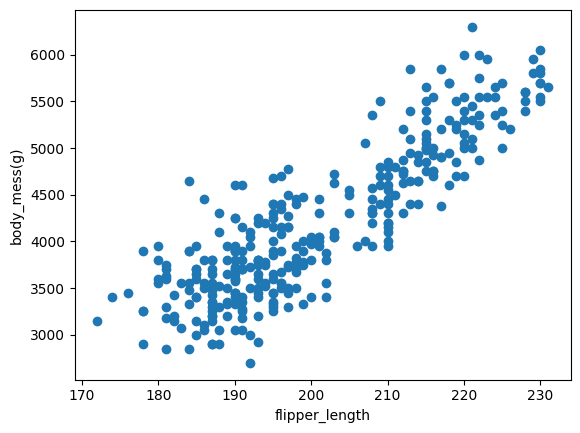

In [477]:
#인사이트를 얻지 못한... 나의.... 그래프
plt.scatter(df_a['flipper_length_mm'], df_a['body_mass_g'])
plt.xlabel('flipper_length')
plt.ylabel('body_mess(g)')
plt.show()

In [419]:
penguin_target = df_a.loc[cond, ['species']]
penguin_target.head()

,species
0,Adelie
1,Adelie
2,Adelie
4,Adelie
5,Adelie


In [420]:
from sklearn.model_selection import train_test_split

In [421]:
train_input, test_input, train_target, test_target = train_test_split(penguin_data, penguin_target, stratify=penguin_target ,random_state=42)

In [422]:
train_target['species']

101    Adelie
5      Adelie
57     Adelie
32     Adelie
267    Gentoo
        ...  
95     Adelie
230    Gentoo
34     Adelie
130    Adelie
140    Adelie
Name: species, Length: 198, dtype: object

In [423]:
from sklearn.neighbors import KNeighborsClassifier

In [424]:
kn = KNeighborsClassifier()

In [425]:
kn.fit(train_input, train_target['species'])

KNeighborsClassifier()

In [426]:
kn.score(test_input, test_target)

0.9104477611940298

In [430]:
kn.predict([[210,4100]])

C:\Users\2-13\Desktop\DMF\ML\venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array(['Adelie'], dtype=object)

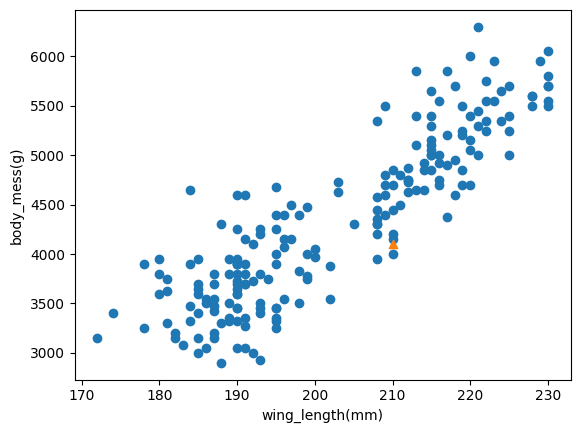

In [431]:
plt.scatter(train_input['flipper_length_mm'], train_input['body_mass_g'])
plt.scatter(210,4100, marker="^")
plt.xlabel('wing_length(mm)')
plt.ylabel('body_mess(g)')
plt.show()

In [432]:
distance, indexes = kn.kneighbors([[210, 4100]])

C:\Users\2-13\Desktop\DMF\ML\venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [433]:
indexes

array([[ 77, 140, 174,  66, 113]])

In [398]:
n_df = train_input.iloc[indexes[0]]

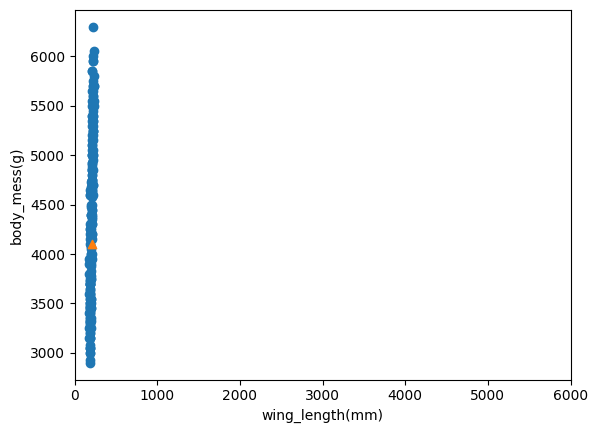

In [434]:
plt.scatter(train_input['flipper_length_mm'], train_input['body_mass_g'])
plt.scatter(210,4100, marker="^")
plt.xlabel('wing_length(mm)')
plt.ylabel('body_mess(g)')
plt.xlim(0,6000)
plt.show()

In [435]:
#표쥰점수 처리(scaled)

In [436]:
mean = train_input.mean()
std = train_input.std()

In [437]:
train_input.head()

,flipper_length_mm,body_mass_g
101,203.0,4725.0
5,190.0,3650.0
57,193.0,3800.0
32,188.0,3300.0
267,225.0,5400.0


In [438]:
train_input.mean()

flipper_length_mm     202.464646
body_mass_g          4337.247475
dtype: float64

In [439]:
train_input.std()

flipper_length_mm     14.797320
body_mass_g          834.103138
dtype: float64

In [440]:
train_scaled = ((train_input-mean) / std)

In [442]:
new = ([210, 4100] - mean) / std
new

flipper_length_mm    0.509238
body_mass_g         -0.284434
dtype: float64

In [443]:
kn.fit(train_scaled, train_target['species'])

KNeighborsClassifier()

In [444]:
test_scaled = (test_input - mean) / std

In [445]:
kn.score(test_scaled, test_target)

1.0

In [446]:
kn.predict([new])

C:\Users\2-13\Desktop\DMF\ML\venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array(['Gentoo'], dtype=object)